In [1]:
import numpy as np
import scipy.io
import os
import cv2
import math
import matplotlib.pyplot as plt
import sklearn
import h5py
from scipy.io import loadmat
# import data_preprocessing

In [2]:
# mat = scipy.io.loadmat('/DATA/TBI/jesseDATA/DoD001/DoD001_Ter001_RC1_Displacement_Normalized_3.mat')
# mat.keys()
# # mat.values()
# x = mat.items()
# print(x)
# print(mat['displacementNorm'])

In [3]:
def find_max_displacement(filepath, cardiac_cycle=1):
    rawData = loadmat(filepath)
    displacement = np.array(list(rawData['displacementNorm']))
    
    # displacementNorm has shape (x_dim, y_dim, 30, n_cycles)
    disShape = displacement.shape
    print(disShape)
    
    displace_data = np.zeros([disShape[0],disShape[1], disShape[2]])
    # print(displace_data.shape)
    
    displace_data[:,:,:] = displacement[:, :, :, cardiac_cycle]
    displace_data = np.array(displace_data.astype('float64'))
    
    disp_avg_list = []
    for i in range(0, 29):
        disp_avg_list.append(np.average(displace_data[:, :, i]))
    # print(disp_avg_list)
    
#     print("max displacement averaged:")
#     print(max(disp_avg_list)) # disp_avg_list.index()
    print("max displacement frame:")
    print(np.argmax(disp_avg_list))
    print("min displacement frame:")
    print(np.argmin(disp_avg_list))
    
    plt.plot(disp_avg_list)

(259, 80, 30, 9)
max displacement frame:
24
min displacement frame:
11


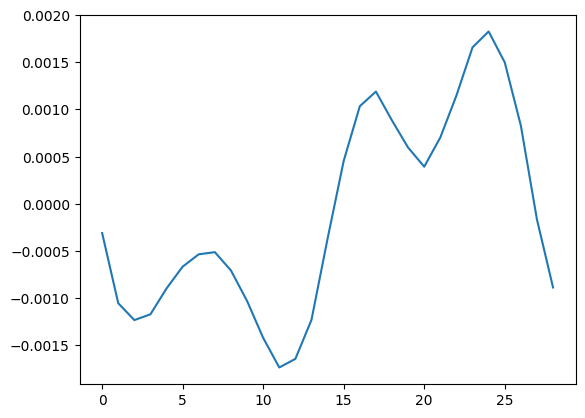

In [4]:
find_max_displacement("/DATA/TBI/jesseDATA/DoD001/DoD001_Ter001_RC1_Displacement_Normalized_3.mat")

In [23]:
def find_max_displacement_quadrants(filepath, cardiac_cycle=1):
    rawData = loadmat(filepath)
    displacement = np.array(list(rawData['displacementNorm']))
    
    # displacementNorm has shape (x_dim, y_dim, 30, n_cycles)
    disShape = displacement.shape
    print(disShape)
    
    displace_data = np.zeros([disShape[0],disShape[1], disShape[2]])
    # print(displace_data.shape)
    
    displace_data[:,:,:] = displacement[:, :, :, cardiac_cycle]
    displace_data = np.array(displace_data.astype('float64'))
    
    disp_avg_first = []
    disp_avg_second = []
    disp_avg_third = []
    disp_avg_fourth = []
    for i in range(0, 29):
        disp_avg_first.append(np.average(displace_data[0:129, 0:40, i]))
        disp_avg_second.append(np.average(displace_data[0:129, 41:79, i]))
        disp_avg_third.append(np.average(displace_data[130:249, 0:40, i]))
        disp_avg_fourth.append(np.average(displace_data[130:249, 41:79, i]))
    
#     print("max displacement averaged first quadrant:")
#     print(max(disp_avg_first))
    print("max displacement frame first quadrant (top left of image):")
    print(np.argmax(disp_avg_first))
    print("min displacement frame first quadrant (top left of image):")
    print(np.argmin(disp_avg_first))
        
#     print("max displacement averaged second quadrant:")
#     print(max(disp_avg_second))
    print("max displacement frame second quadrant (top right of image):")
    print(np.argmax(disp_avg_second))
    print("min displacement frame second quadrant (top right of image):")
    print(np.argmin(disp_avg_second))
    
#     print("max displacement averaged third quadrant:")
#     print(max(disp_avg_third))
    print("max displacement frame third quadrant (bottom left of image):")
    print(np.argmax(disp_avg_third))
    print("min displacement frame third quadrant (bottom left of image):")
    print(np.argmin(disp_avg_third))
    
#     print("max displacement averaged fourth quadrant:")
#     print(max(disp_avg_fourth))
    print("max displacement frame fourth quadrant (bottom right of image):")
    print(np.argmax(disp_avg_fourth))
    print("min displacement frame fourth quadrant (bottom right of image):")
    print(np.argmin(disp_avg_fourth))

In [24]:
find_max_displacement_quadrants("/DATA/TBI/jesseDATA/DoD001/DoD001_Ter001_RC1_Displacement_Normalized_3.mat")

(259, 80, 30, 9)
max displacement frame first quadrant (top left of image):
26
min displacement frame first quadrant (top left of image):
11
max displacement frame second quadrant (top right of image):
26
min displacement frame second quadrant (top right of image):
10
max displacement frame third quadrant (bottom left of image):
16
min displacement frame third quadrant (bottom left of image):
27
max displacement frame fourth quadrant (bottom right of image):
15
min displacement frame fourth quadrant (bottom right of image):
28


In [42]:
velocity = loadmat("/DATA/TBI/NayanaDATA/DoD301/TPIData_20220103_103611.mat")

In [43]:
velocity.keys()

dict_keys(['__header__', '__version__', '__globals__', 'xAxis', 'zAxis', 'TDI00001', 'TDIEnvelope00001', 'TDI00002', 'TDIEnvelope00002', 'TDI00003', 'TDIEnvelope00003', 'TDI00004', 'TDIEnvelope00004', 'TDI00005', 'TDIEnvelope00005', 'TDI00006', 'TDIEnvelope00006', 'TDI00007', 'TDIEnvelope00007', 'TDI00008', 'TDIEnvelope00008', 'TDI00009', 'TDIEnvelope00009', 'TDI00010', 'TDIEnvelope00010', 'TDI00011', 'TDIEnvelope00011', 'TDI00012', 'TDIEnvelope00012', 'TDI00013', 'TDIEnvelope00013', 'TDI00014', 'TDIEnvelope00014', 'TDI00015', 'TDIEnvelope00015', 'TDI00016', 'TDIEnvelope00016', 'TDI00017', 'TDIEnvelope00017', 'TDI00018', 'TDIEnvelope00018', 'TDI00019', 'TDIEnvelope00019', 'TDI00020', 'TDIEnvelope00020', 'TDI00021', 'TDIEnvelope00021', 'TDI00022', 'TDIEnvelope00022', 'TDI00023', 'TDIEnvelope00023', 'TDI00024', 'TDIEnvelope00024', 'TDI00025', 'TDIEnvelope00025', 'TDI00026', 'TDIEnvelope00026', 'TDI00027', 'TDIEnvelope00027', 'TDI00028', 'TDIEnvelope00028', 'TDI00029', 'TDIEnvelope00029',

In [44]:
velocity['TDI00001'].shape

(40, 28)

In [45]:
velocity['__header__']

b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Jan  3 10:36:12 2022'